Procesamiento de Datos

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

def load_images_from_multiple_folders(main_folder):
    images = []
    labels = []
    # Recorrer las carpetas vid0 a vid9 dentro de la carpeta principal
    for i in range(10):
        subfolder_path = os.path.join(main_folder, f'vid{i}')
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                if os.path.isfile(img_path):
                    img = cv2.imread(img_path)
                    if img is not None:
                        # Redimensionar la imagen si es necesario
                        img = cv2.resize(img, (224, 224))  # Ajusta este tamaño según sea necesario
                        img = img_to_array(img)
                        images.append(img)
                        # Supongamos que el nombre del frame significativo contiene 'significant'
                        label = 1 if 'significant' in filename else 0
                        labels.append(label)
    return np.array(images), np.array(labels)

# Ruta a la carpeta principal
main_folder_path = '/content/'

# Cargar imágenes y etiquetas
X, y = load_images_from_multiple_folders(main_folder_path)

In [8]:
X = X.astype('float32') / 255.0

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (761, 224, 224, 3)
Tamaño del conjunto de prueba: (191, 224, 224, 3)


Construcción del modelo (Versión 1)

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import cv2

# Por ejemplo, si X es una matriz de imágenes, y quieres obtener las dimensiones de la primera imagen:
altura, anchura, canales = X[0].shape

# Paso 2: Construcción del modelo

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(altura, anchura, canales)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Salida binaria: frame significativo o no
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo y guardar el historial de entrenamiento
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


# Paso 3: Evaluación del modelo

y_pred = model.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

print(classification_report(y_test, y_pred_binary))


Epoch 1/20
24/24 [==============================] - 84s 3s/step - loss: 0.1456 - accuracy: 0.9908 - val_loss: 0.0855 - val_accuracy: 0.9895
Epoch 2/20
24/24 [==============================] - 96s 4s/step - loss: 0.0764 - accuracy: 0.9908 - val_loss: 0.0651 - val_accuracy: 0.9895
Epoch 3/20
24/24 [==============================] - 87s 4s/step - loss: 0.0637 - accuracy: 0.9908 - val_loss: 0.0635 - val_accuracy: 0.9895
Epoch 4/20
24/24 [==============================] - 88s 4s/step - loss: 0.0607 - accuracy: 0.9908 - val_loss: 0.0617 - val_accuracy: 0.9895
Epoch 5/20
24/24 [==============================] - 82s 3s/step - loss: 0.0657 - accuracy: 0.9908 - val_loss: 0.0964 - val_accuracy: 0.9895
Epoch 6/20
24/24 [==============================] - 85s 4s/step - loss: 0.0812 - accuracy: 0.9908 - val_loss: 0.0684 - val_accuracy: 0.9895
Epoch 7/20
24/24 [==============================] - 87s 4s/step - loss: 0.0772 - accuracy: 0.9908 - val_loss: 0.0698 - val_accuracy: 0.9895
Epoch 8/20
24/24 [==

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


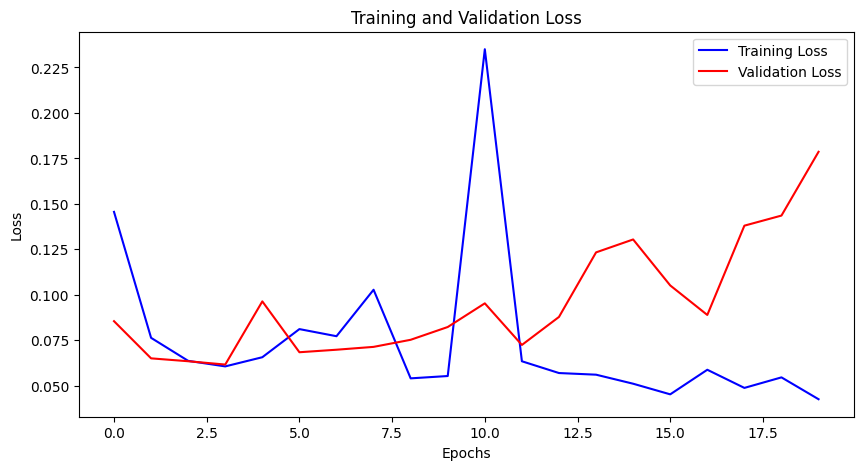

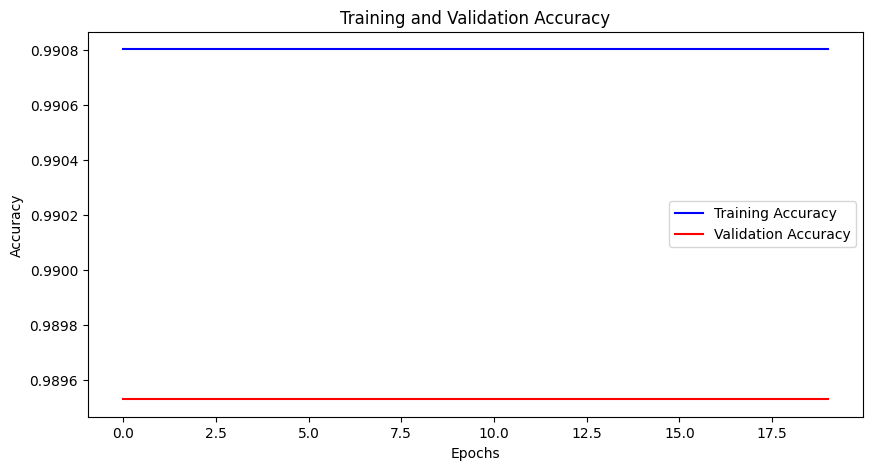

In [10]:
import matplotlib.pyplot as plt

# Obtener las métricas del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Visualizar la pérdida durante el entrenamiento y la validación
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizar la precisión durante el entrenamiento y la validación
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
